In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
pd.set_option('display.max_rows',50)

## Importing Data

In [3]:
# Read MTA turnstile data for the month of April for the years 2015-2017 from http://web.mta.info/developers/turnstile.html
# saves merged data in a csv file
# EXEC JUST ONE TIME then read from created csv (look at cell immediately below).

full_dataset=pd.DataFrame(columns=['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES'])
file='http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
file_list=['170401','170408', '170415', '170422', '170429',
           '160402','160409', '160416', '160423', '160430',
           '150404','150411', '150418', '150425', '150502']
           
for i in file_list :
    file_name=file.format(i)
    print(file_name)#to check if downloading
    df=pd.read_csv(file_name)
    full_dataset=pd.concat([full_dataset,df], ignore_index=True)#ignore_index to reset index automatically as it merges to ensure unique indexes.
    full_dataset.to_csv('full_mta_april.csv')


http://web.mta.info/developers/data/nyct/turnstile/turnstile_170401.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170408.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170415.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170422.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170429.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160402.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160409.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160416.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160423.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160430.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_150404.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_150411.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_150418.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_150

In [ ]:
# IF ALREADY CREATED CSV FILE, START FROM HERE.
# full_dataset=pd.read_csv('csv/full_mta_april.csv')

In [80]:
# checking all years got downloaded
print(full_dataset.groupby('DATE').agg('count'))

               CA   DESC  DIVISION  ENTRIES  \
DATE                                          
03/25/2017  24247  24247     24247    24247   
03/26/2016  24883  24883     24883    24883   
03/26/2017  27952  27952     27952    27952   
03/27/2016  27251  27251     27251    27251   
03/27/2017  28490  28490     28490    28490   
03/28/2015  27055  27055     27055    27055   
03/28/2016  27980  27980     27980    27980   
03/28/2017  27939  27939     27939    27939   
03/29/2015  27039  27039     27039    27039   
03/29/2016  27149  27149     27149    27149   
03/29/2017  27823  27823     27823    27823   
03/30/2015  26842  26842     26842    26842   
03/30/2016  26832  26832     26832    26832   
03/30/2017  27921  27921     27921    27921   
03/31/2015  27045  27045     27045    27045   
03/31/2016  27819  27819     27819    27819   
03/31/2017  27772  27772     27772    27772   
04/01/2015  26790  26790     26790    26790   
04/01/2016  27256  27256     27256    27256   
04/01/2017  2

## Data cleaning

In [81]:
# in the above cell, we observed that the 'ENTRIES' column had a lot of lingering whitespace 
# the following code will remove any whitespace from all column names.
full_dataset.columns = [column.strip() for column in full_dataset.columns]
full_dataset.columns

Index(['CA', 'DATE', 'DESC', 'DIVISION', 'ENTRIES', 'EXITS', 'LINENAME', 'SCP',
       'STATION', 'TIME', 'UNIT', 'DTTM', 'MONTH', 'YEAR', 'WEEKDAY',
       'ENTRY_CNT', 'STATION_NAME', 'ENTRY_PCT'],
      dtype='object')

In [17]:
# renaming column for convience
full_dataset=full_dataset.rename(columns={'C/A': 'CA'})
full_dataset

,CA,DATE,DESC,DIVISION,ENTRIES,EXITS,LINENAME,SCP,STATION,TIME,UNIT,DTTM,MONTH,YEAR,WEEKDAY
0,A002,03/25/2017,REGULAR,BMT,6108321,2069313.0,NQR456W,02-00-00,59 ST,00:00:00,R051,2017-03-25 00:00:00,3,2017,5
1,A002,03/25/2017,REGULAR,BMT,6108343,2069319.0,NQR456W,02-00-00,59 ST,04:00:00,R051,2017-03-25 04:00:00,3,2017,5
2,A002,03/25/2017,REGULAR,BMT,6108360,2069347.0,NQR456W,02-00-00,59 ST,08:00:00,R051,2017-03-25 08:00:00,3,2017,5
3,A002,03/25/2017,REGULAR,BMT,6108462,2069456.0,NQR456W,02-00-00,59 ST,12:00:00,R051,2017-03-25 12:00:00,3,2017,5
4,A002,03/25/2017,REGULAR,BMT,6108689,2069525.0,NQR456W,02-00-00,59 ST,16:00:00,R051,2017-03-25 16:00:00,3,2017,5
5,A002,03/25/2017,REGULAR,BMT,6108983,2069570.0,NQR456W,02-00-00,59 ST,20:00:00,R051,2017-03-25 20:00:00,3,2017,5
6,A002,03/26/2017,REGULAR,BMT,6109170,2069608.0,NQR456W,02-00-00,59 ST,00:00:00,R051,2017-03-26 00:00:00,3,2017,6
7,A002,03/26/2017,REGULAR,BMT,6109213,2069615.0,NQR456W,02-00-00,59 ST,04:00:00,R051,2017-03-26 04:00:00,3,2017,6
8,A002,03/26/2017,REGULAR,BMT,6109224,2069630.0,NQR456W,02-00-00,59 ST,08:00:00,R051,2017-03-26 08:00:00,3,2017,6
9,A002,03/26/2017,REGULAR,BMT,6109284,2069706.0,NQR456W,02-00-00,59 ST,12:00:00,R051,2017-03-26 12:00:00,3,2017,6


In [95]:
#checking for mispellings and accidental multiple entries 
full_dataset.STATION.unique()
#'1 AV', '1 AVE'

array(['1 AV', '1 AVE', '103 ST', '103 ST-CORONA', '104 ST', '110 ST',
       '110 ST-CATHEDRL', '110 ST-CPN', '111 ST', '116 ST',
       '116 ST-COLUMBIA', '121 ST', '125 ST', '135 ST', '137 ST CITY COL',
       '137 ST-CITY COL', '138 ST-3 AVE', '138 ST-GR CONC',
       '138/GRAND CONC', '14 ST', '14 ST-6 AVE', '14 ST-UNION SQ',
       '145 ST', '148 ST-LENOX', '149 ST-3 AVE', '149 ST-GR CONC',
       '149/GRAND CONC', '14TH STREET', '15 ST-PROSPECT', '155 ST',
       '157 ST', '161 ST-YANKEE', '161/YANKEE STAD', '163 ST-AMSTERDM',
       '167 ST', '168 ST', '168 ST-BROADWAY', '169 ST', '170 ST',
       '174 ST', '174-175 ST', '174-175 STS', '175 ST', '176 ST', '18 AV',
       '18 AVE', '18 ST', '181 ST', '182-183 ST', '182-183 STS', '183 ST',
       '190 ST', '191 ST', '2 AV', '2 AVE', '20 AV', '20 AVE', '207 ST',
       '21 ST', '21 ST-QNSBRIDGE', '215 ST', '219 ST', '22 AVE-BAY PKY',
       '225 ST', '23 ST', '23 ST-5 AVE', '23 ST-6 AVE', '231 ST',
       '233 ST', '238 ST', '242 

In [108]:
#Dup_1stAve = full_dataset[(full_dataset.STATION == "1 AVE") & (full_dataset.LINENAME == "L" )]
full_dataset.loc[(full_dataset.STATION == "1 AVE") & (full_dataset.LINENAME == "L" ), 'STATION'] = '1 AV'


In [110]:
#there are several MTA lines that are written in different order but refer to the same causing double entries in queries
#the following code will sort the string and rejoin it
full_dataset['LINENAME']=full_dataset['LINENAME'].apply(lambda x: ''.join(sorted(x)))

In [111]:
#check dataset
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877070 entries, 1022483 to 2898557
Data columns (total 18 columns):
CA              object
DATE            object
DESC            object
DIVISION        object
ENTRIES         int64
EXITS           float64
LINENAME        object
SCP             object
STATION         object
TIME            object
UNIT            object
DTTM            datetime64[ns]
MONTH           int64
YEAR            int64
WEEKDAY         int64
ENTRY_CNT       float64
STATION_NAME    object
ENTRY_PCT       float64
dtypes: datetime64[ns](1), float64(3), int64(4), object(10)
memory usage: 417.1+ MB


## Adding new columns with transformed data from DATE column

In [112]:
# format='%m/%d/%Y %H:%M:%S'
full_dataset['DTTM']=pd.to_datetime(full_dataset['DATE'] + ' ' + full_dataset['TIME'], infer_datetime_format=True)
full_dataset

,CA,DATE,DESC,DIVISION,ENTRIES,EXITS,LINENAME,SCP,STATION,TIME,UNIT,DTTM,MONTH,YEAR,WEEKDAY,ENTRY_CNT,STATION_NAME,ENTRY_PCT
1022483,H007,03/26/2016,REGULAR,BMT,10883649,11864934.0,L,00-00-00,1 AV,00:00:00,R248,2016-03-26 00:00:00,3,2016,5,0.0,1 AV L,0.000000
1022484,H007,03/26/2016,REGULAR,BMT,10883779,11865305.0,L,00-00-00,1 AV,04:00:00,R248,2016-03-26 04:00:00,3,2016,5,130.0,1 AV L,0.000026
1022485,H007,03/26/2016,REGULAR,BMT,10883856,11865571.0,L,00-00-00,1 AV,08:00:00,R248,2016-03-26 08:00:00,3,2016,5,77.0,1 AV L,0.000015
1022486,H007,03/26/2016,REGULAR,BMT,10884397,11866283.0,L,00-00-00,1 AV,12:00:00,R248,2016-03-26 12:00:00,3,2016,5,541.0,1 AV L,0.000107
1022487,H007,03/26/2016,REGULAR,BMT,10885131,11867430.0,L,00-00-00,1 AV,16:00:00,R248,2016-03-26 16:00:00,3,2016,5,734.0,1 AV L,0.000145
1022488,H007,03/26/2016,REGULAR,BMT,10885872,11868559.0,L,00-00-00,1 AV,20:00:00,R248,2016-03-26 20:00:00,3,2016,5,741.0,1 AV L,0.000146
1022489,H007,03/27/2016,REGULAR,BMT,10886335,11869367.0,L,00-00-00,1 AV,00:00:00,R248,2016-03-27 00:00:00,3,2016,6,463.0,1 AV L,0.000091
1022490,H007,03/27/2016,REGULAR,BMT,10886462,11869693.0,L,00-00-00,1 AV,04:00:00,R248,2016-03-27 04:00:00,3,2016,6,127.0,1 AV L,0.000025
1022491,H007,03/27/2016,REGULAR,BMT,10886513,11869856.0,L,00-00-00,1 AV,08:00:00,R248,2016-03-27 08:00:00,3,2016,6,51.0,1 AV L,0.000010
1022492,H007,03/27/2016,REGULAR,BMT,10886975,11870436.0,L,00-00-00,1 AV,12:00:00,R248,2016-03-27 12:00:00,3,2016,6,462.0,1 AV L,0.000091


In [113]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877070 entries, 1022483 to 2898557
Data columns (total 18 columns):
CA              object
DATE            object
DESC            object
DIVISION        object
ENTRIES         int64
EXITS           float64
LINENAME        object
SCP             object
STATION         object
TIME            object
UNIT            object
DTTM            datetime64[ns]
MONTH           int64
YEAR            int64
WEEKDAY         int64
ENTRY_CNT       float64
STATION_NAME    object
ENTRY_PCT       float64
dtypes: datetime64[ns](1), float64(3), int64(4), object(10)
memory usage: 417.1+ MB


In [114]:
# making a new column that just stores the month 
full_dataset['MONTH']=[x.month for x in full_dataset['DTTM']]
full_dataset

,CA,DATE,DESC,DIVISION,ENTRIES,EXITS,LINENAME,SCP,STATION,TIME,UNIT,DTTM,MONTH,YEAR,WEEKDAY,ENTRY_CNT,STATION_NAME,ENTRY_PCT
1022483,H007,03/26/2016,REGULAR,BMT,10883649,11864934.0,L,00-00-00,1 AV,00:00:00,R248,2016-03-26 00:00:00,3,2016,5,0.0,1 AV L,0.000000
1022484,H007,03/26/2016,REGULAR,BMT,10883779,11865305.0,L,00-00-00,1 AV,04:00:00,R248,2016-03-26 04:00:00,3,2016,5,130.0,1 AV L,0.000026
1022485,H007,03/26/2016,REGULAR,BMT,10883856,11865571.0,L,00-00-00,1 AV,08:00:00,R248,2016-03-26 08:00:00,3,2016,5,77.0,1 AV L,0.000015
1022486,H007,03/26/2016,REGULAR,BMT,10884397,11866283.0,L,00-00-00,1 AV,12:00:00,R248,2016-03-26 12:00:00,3,2016,5,541.0,1 AV L,0.000107
1022487,H007,03/26/2016,REGULAR,BMT,10885131,11867430.0,L,00-00-00,1 AV,16:00:00,R248,2016-03-26 16:00:00,3,2016,5,734.0,1 AV L,0.000145
1022488,H007,03/26/2016,REGULAR,BMT,10885872,11868559.0,L,00-00-00,1 AV,20:00:00,R248,2016-03-26 20:00:00,3,2016,5,741.0,1 AV L,0.000146
1022489,H007,03/27/2016,REGULAR,BMT,10886335,11869367.0,L,00-00-00,1 AV,00:00:00,R248,2016-03-27 00:00:00,3,2016,6,463.0,1 AV L,0.000091
1022490,H007,03/27/2016,REGULAR,BMT,10886462,11869693.0,L,00-00-00,1 AV,04:00:00,R248,2016-03-27 04:00:00,3,2016,6,127.0,1 AV L,0.000025
1022491,H007,03/27/2016,REGULAR,BMT,10886513,11869856.0,L,00-00-00,1 AV,08:00:00,R248,2016-03-27 08:00:00,3,2016,6,51.0,1 AV L,0.000010
1022492,H007,03/27/2016,REGULAR,BMT,10886975,11870436.0,L,00-00-00,1 AV,12:00:00,R248,2016-03-27 12:00:00,3,2016,6,462.0,1 AV L,0.000091


In [115]:
# making a new column that just stores the year
full_dataset['YEAR']=[x.year for x in full_dataset['DTTM']]
full_dataset

,CA,DATE,DESC,DIVISION,ENTRIES,EXITS,LINENAME,SCP,STATION,TIME,UNIT,DTTM,MONTH,YEAR,WEEKDAY,ENTRY_CNT,STATION_NAME,ENTRY_PCT
1022483,H007,03/26/2016,REGULAR,BMT,10883649,11864934.0,L,00-00-00,1 AV,00:00:00,R248,2016-03-26 00:00:00,3,2016,5,0.0,1 AV L,0.000000
1022484,H007,03/26/2016,REGULAR,BMT,10883779,11865305.0,L,00-00-00,1 AV,04:00:00,R248,2016-03-26 04:00:00,3,2016,5,130.0,1 AV L,0.000026
1022485,H007,03/26/2016,REGULAR,BMT,10883856,11865571.0,L,00-00-00,1 AV,08:00:00,R248,2016-03-26 08:00:00,3,2016,5,77.0,1 AV L,0.000015
1022486,H007,03/26/2016,REGULAR,BMT,10884397,11866283.0,L,00-00-00,1 AV,12:00:00,R248,2016-03-26 12:00:00,3,2016,5,541.0,1 AV L,0.000107
1022487,H007,03/26/2016,REGULAR,BMT,10885131,11867430.0,L,00-00-00,1 AV,16:00:00,R248,2016-03-26 16:00:00,3,2016,5,734.0,1 AV L,0.000145
1022488,H007,03/26/2016,REGULAR,BMT,10885872,11868559.0,L,00-00-00,1 AV,20:00:00,R248,2016-03-26 20:00:00,3,2016,5,741.0,1 AV L,0.000146
1022489,H007,03/27/2016,REGULAR,BMT,10886335,11869367.0,L,00-00-00,1 AV,00:00:00,R248,2016-03-27 00:00:00,3,2016,6,463.0,1 AV L,0.000091
1022490,H007,03/27/2016,REGULAR,BMT,10886462,11869693.0,L,00-00-00,1 AV,04:00:00,R248,2016-03-27 04:00:00,3,2016,6,127.0,1 AV L,0.000025
1022491,H007,03/27/2016,REGULAR,BMT,10886513,11869856.0,L,00-00-00,1 AV,08:00:00,R248,2016-03-27 08:00:00,3,2016,6,51.0,1 AV L,0.000010
1022492,H007,03/27/2016,REGULAR,BMT,10886975,11870436.0,L,00-00-00,1 AV,12:00:00,R248,2016-03-27 12:00:00,3,2016,6,462.0,1 AV L,0.000091


In [116]:
# making a new column that just stores the day of the week
full_dataset['WEEKDAY']=[x.weekday() for x in full_dataset['DTTM']]
full_dataset

,CA,DATE,DESC,DIVISION,ENTRIES,EXITS,LINENAME,SCP,STATION,TIME,UNIT,DTTM,MONTH,YEAR,WEEKDAY,ENTRY_CNT,STATION_NAME,ENTRY_PCT
1022483,H007,03/26/2016,REGULAR,BMT,10883649,11864934.0,L,00-00-00,1 AV,00:00:00,R248,2016-03-26 00:00:00,3,2016,5,0.0,1 AV L,0.000000
1022484,H007,03/26/2016,REGULAR,BMT,10883779,11865305.0,L,00-00-00,1 AV,04:00:00,R248,2016-03-26 04:00:00,3,2016,5,130.0,1 AV L,0.000026
1022485,H007,03/26/2016,REGULAR,BMT,10883856,11865571.0,L,00-00-00,1 AV,08:00:00,R248,2016-03-26 08:00:00,3,2016,5,77.0,1 AV L,0.000015
1022486,H007,03/26/2016,REGULAR,BMT,10884397,11866283.0,L,00-00-00,1 AV,12:00:00,R248,2016-03-26 12:00:00,3,2016,5,541.0,1 AV L,0.000107
1022487,H007,03/26/2016,REGULAR,BMT,10885131,11867430.0,L,00-00-00,1 AV,16:00:00,R248,2016-03-26 16:00:00,3,2016,5,734.0,1 AV L,0.000145
1022488,H007,03/26/2016,REGULAR,BMT,10885872,11868559.0,L,00-00-00,1 AV,20:00:00,R248,2016-03-26 20:00:00,3,2016,5,741.0,1 AV L,0.000146
1022489,H007,03/27/2016,REGULAR,BMT,10886335,11869367.0,L,00-00-00,1 AV,00:00:00,R248,2016-03-27 00:00:00,3,2016,6,463.0,1 AV L,0.000091
1022490,H007,03/27/2016,REGULAR,BMT,10886462,11869693.0,L,00-00-00,1 AV,04:00:00,R248,2016-03-27 04:00:00,3,2016,6,127.0,1 AV L,0.000025
1022491,H007,03/27/2016,REGULAR,BMT,10886513,11869856.0,L,00-00-00,1 AV,08:00:00,R248,2016-03-27 08:00:00,3,2016,6,51.0,1 AV L,0.000010
1022492,H007,03/27/2016,REGULAR,BMT,10886975,11870436.0,L,00-00-00,1 AV,12:00:00,R248,2016-03-27 12:00:00,3,2016,6,462.0,1 AV L,0.000091


In [117]:
full_dataset.dtypes

CA                      object
DATE                    object
DESC                    object
DIVISION                object
ENTRIES                  int64
EXITS                  float64
LINENAME                object
SCP                     object
STATION                 object
TIME                    object
UNIT                    object
DTTM            datetime64[ns]
MONTH                    int64
YEAR                     int64
WEEKDAY                  int64
ENTRY_CNT              float64
STATION_NAME            object
ENTRY_PCT              float64
dtype: object

In [118]:
# Check for duplicates rows by 'CA', 'UNIT', 'SCP', 'STATION', 'DTTM'
dup_dataset=((full_dataset.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'DTTM'])
              .ENTRIES.count().reset_index()
              .sort_values('ENTRIES', ascending=False))['ENTRIES']>1).sum()
dup_dataset

0

In [119]:
# Drop duplicates
full_dataset=full_dataset.drop_duplicates(['CA', 'UNIT', 'SCP', 'STATION', 'DTTM'])

In [120]:
# Sort data by turnstile and datetime
full_dataset=full_dataset.sort_values(['STATION','LINENAME', 'CA', 'SCP', 'DTTM'])
full_dataset

,CA,DATE,DESC,DIVISION,ENTRIES,EXITS,LINENAME,SCP,STATION,TIME,UNIT,DTTM,MONTH,YEAR,WEEKDAY,ENTRY_CNT,STATION_NAME,ENTRY_PCT
1992351,H007,03/28/2015,REGULAR,BMT,9517255,10343369.0,L,00-00-00,1 AV,00:00:00,R248,2015-03-28 00:00:00,3,2015,5,0.0,1 AVE L,0.000000
1992352,H007,03/28/2015,REGULAR,BMT,9517594,10343662.0,L,00-00-00,1 AV,04:00:00,R248,2015-03-28 04:00:00,3,2015,5,339.0,1 AVE L,0.000067
1992353,H007,03/28/2015,REGULAR,BMT,9517820,10343978.0,L,00-00-00,1 AV,08:00:00,R248,2015-03-28 08:00:00,3,2015,5,226.0,1 AVE L,0.000045
1992354,H007,03/28/2015,REGULAR,BMT,9518976,10344680.0,L,00-00-00,1 AV,12:00:00,R248,2015-03-28 12:00:00,3,2015,5,1156.0,1 AVE L,0.000228
1992355,H007,03/28/2015,REGULAR,BMT,9520343,10345667.0,L,00-00-00,1 AV,16:00:00,R248,2015-03-28 16:00:00,3,2015,5,1367.0,1 AVE L,0.000269
1992356,H007,03/28/2015,REGULAR,BMT,9521084,10346984.0,L,00-00-00,1 AV,20:00:00,R248,2015-03-28 20:00:00,3,2015,5,741.0,1 AVE L,0.000146
1992357,H007,03/29/2015,REGULAR,BMT,9521707,10347861.0,L,00-00-00,1 AV,00:00:00,R248,2015-03-29 00:00:00,3,2015,6,623.0,1 AVE L,0.000123
1992358,H007,03/29/2015,REGULAR,BMT,9521946,10348240.0,L,00-00-00,1 AV,04:00:00,R248,2015-03-29 04:00:00,3,2015,6,239.0,1 AVE L,0.000047
1992359,H007,03/29/2015,REGULAR,BMT,9522007,10348471.0,L,00-00-00,1 AV,08:00:00,R248,2015-03-29 08:00:00,3,2015,6,61.0,1 AVE L,0.000012
1992360,H007,03/29/2015,REGULAR,BMT,9522484,10349154.0,L,00-00-00,1 AV,12:00:00,R248,2015-03-29 12:00:00,3,2015,6,477.0,1 AVE L,0.000094


In [121]:
# cheking for any null values
full_dataset[full_dataset.isnull()==True].count()
# full_dataset.isnull().values.any()

CA              0
DATE            0
DESC            0
DIVISION        0
ENTRIES         0
EXITS           0
LINENAME        0
SCP             0
STATION         0
TIME            0
UNIT            0
DTTM            0
MONTH           0
YEAR            0
WEEKDAY         0
ENTRY_CNT       0
STATION_NAME    0
ENTRY_PCT       0
dtype: int64

In [122]:
#if there were NANs, this could be used to give them 0 if you choose to keep the rows
full_dataset=full_dataset.fillna(0)
full_dataset

,CA,DATE,DESC,DIVISION,ENTRIES,EXITS,LINENAME,SCP,STATION,TIME,UNIT,DTTM,MONTH,YEAR,WEEKDAY,ENTRY_CNT,STATION_NAME,ENTRY_PCT
1992351,H007,03/28/2015,REGULAR,BMT,9517255,10343369.0,L,00-00-00,1 AV,00:00:00,R248,2015-03-28 00:00:00,3,2015,5,0.0,1 AVE L,0.000000
1992352,H007,03/28/2015,REGULAR,BMT,9517594,10343662.0,L,00-00-00,1 AV,04:00:00,R248,2015-03-28 04:00:00,3,2015,5,339.0,1 AVE L,0.000067
1992353,H007,03/28/2015,REGULAR,BMT,9517820,10343978.0,L,00-00-00,1 AV,08:00:00,R248,2015-03-28 08:00:00,3,2015,5,226.0,1 AVE L,0.000045
1992354,H007,03/28/2015,REGULAR,BMT,9518976,10344680.0,L,00-00-00,1 AV,12:00:00,R248,2015-03-28 12:00:00,3,2015,5,1156.0,1 AVE L,0.000228
1992355,H007,03/28/2015,REGULAR,BMT,9520343,10345667.0,L,00-00-00,1 AV,16:00:00,R248,2015-03-28 16:00:00,3,2015,5,1367.0,1 AVE L,0.000269
1992356,H007,03/28/2015,REGULAR,BMT,9521084,10346984.0,L,00-00-00,1 AV,20:00:00,R248,2015-03-28 20:00:00,3,2015,5,741.0,1 AVE L,0.000146
1992357,H007,03/29/2015,REGULAR,BMT,9521707,10347861.0,L,00-00-00,1 AV,00:00:00,R248,2015-03-29 00:00:00,3,2015,6,623.0,1 AVE L,0.000123
1992358,H007,03/29/2015,REGULAR,BMT,9521946,10348240.0,L,00-00-00,1 AV,04:00:00,R248,2015-03-29 04:00:00,3,2015,6,239.0,1 AVE L,0.000047
1992359,H007,03/29/2015,REGULAR,BMT,9522007,10348471.0,L,00-00-00,1 AV,08:00:00,R248,2015-03-29 08:00:00,3,2015,6,61.0,1 AVE L,0.000012
1992360,H007,03/29/2015,REGULAR,BMT,9522484,10349154.0,L,00-00-00,1 AV,12:00:00,R248,2015-03-29 12:00:00,3,2015,6,477.0,1 AVE L,0.000094


In [123]:
# Calculate absolute entries by turnstile/datetime
full_dataset['ENTRY_CNT']=full_dataset.groupby(['CA', 'UNIT', 'STATION', 'LINENAME', 'SCP'])['ENTRIES'].diff()
full_dataset

,CA,DATE,DESC,DIVISION,ENTRIES,EXITS,LINENAME,SCP,STATION,TIME,UNIT,DTTM,MONTH,YEAR,WEEKDAY,ENTRY_CNT,STATION_NAME,ENTRY_PCT
1992351,H007,03/28/2015,REGULAR,BMT,9517255,10343369.0,L,00-00-00,1 AV,00:00:00,R248,2015-03-28 00:00:00,3,2015,5,NaN,1 AVE L,0.000000
1992352,H007,03/28/2015,REGULAR,BMT,9517594,10343662.0,L,00-00-00,1 AV,04:00:00,R248,2015-03-28 04:00:00,3,2015,5,339.0,1 AVE L,0.000067
1992353,H007,03/28/2015,REGULAR,BMT,9517820,10343978.0,L,00-00-00,1 AV,08:00:00,R248,2015-03-28 08:00:00,3,2015,5,226.0,1 AVE L,0.000045
1992354,H007,03/28/2015,REGULAR,BMT,9518976,10344680.0,L,00-00-00,1 AV,12:00:00,R248,2015-03-28 12:00:00,3,2015,5,1156.0,1 AVE L,0.000228
1992355,H007,03/28/2015,REGULAR,BMT,9520343,10345667.0,L,00-00-00,1 AV,16:00:00,R248,2015-03-28 16:00:00,3,2015,5,1367.0,1 AVE L,0.000269
1992356,H007,03/28/2015,REGULAR,BMT,9521084,10346984.0,L,00-00-00,1 AV,20:00:00,R248,2015-03-28 20:00:00,3,2015,5,741.0,1 AVE L,0.000146
1992357,H007,03/29/2015,REGULAR,BMT,9521707,10347861.0,L,00-00-00,1 AV,00:00:00,R248,2015-03-29 00:00:00,3,2015,6,623.0,1 AVE L,0.000123
1992358,H007,03/29/2015,REGULAR,BMT,9521946,10348240.0,L,00-00-00,1 AV,04:00:00,R248,2015-03-29 04:00:00,3,2015,6,239.0,1 AVE L,0.000047
1992359,H007,03/29/2015,REGULAR,BMT,9522007,10348471.0,L,00-00-00,1 AV,08:00:00,R248,2015-03-29 08:00:00,3,2015,6,61.0,1 AVE L,0.000012
1992360,H007,03/29/2015,REGULAR,BMT,9522484,10349154.0,L,00-00-00,1 AV,12:00:00,R248,2015-03-29 12:00:00,3,2015,6,477.0,1 AVE L,0.000094


In [125]:
#Remove negative values
full_dataset=full_dataset[full_dataset.ENTRY_CNT>=0]
full_dataset

,CA,DATE,DESC,DIVISION,ENTRIES,EXITS,LINENAME,SCP,STATION,TIME,UNIT,DTTM,MONTH,YEAR,WEEKDAY,ENTRY_CNT,STATION_NAME,ENTRY_PCT
1992351,H007,03/28/2015,REGULAR,BMT,9517255,10343369.0,L,00-00-00,1 AV,00:00:00,R248,2015-03-28 00:00:00,3,2015,5,0.0,1 AVE L,0.000000
1992352,H007,03/28/2015,REGULAR,BMT,9517594,10343662.0,L,00-00-00,1 AV,04:00:00,R248,2015-03-28 04:00:00,3,2015,5,339.0,1 AVE L,0.000067
1992353,H007,03/28/2015,REGULAR,BMT,9517820,10343978.0,L,00-00-00,1 AV,08:00:00,R248,2015-03-28 08:00:00,3,2015,5,226.0,1 AVE L,0.000045
1992354,H007,03/28/2015,REGULAR,BMT,9518976,10344680.0,L,00-00-00,1 AV,12:00:00,R248,2015-03-28 12:00:00,3,2015,5,1156.0,1 AVE L,0.000228
1992355,H007,03/28/2015,REGULAR,BMT,9520343,10345667.0,L,00-00-00,1 AV,16:00:00,R248,2015-03-28 16:00:00,3,2015,5,1367.0,1 AVE L,0.000269
1992356,H007,03/28/2015,REGULAR,BMT,9521084,10346984.0,L,00-00-00,1 AV,20:00:00,R248,2015-03-28 20:00:00,3,2015,5,741.0,1 AVE L,0.000146
1992357,H007,03/29/2015,REGULAR,BMT,9521707,10347861.0,L,00-00-00,1 AV,00:00:00,R248,2015-03-29 00:00:00,3,2015,6,623.0,1 AVE L,0.000123
1992358,H007,03/29/2015,REGULAR,BMT,9521946,10348240.0,L,00-00-00,1 AV,04:00:00,R248,2015-03-29 04:00:00,3,2015,6,239.0,1 AVE L,0.000047
1992359,H007,03/29/2015,REGULAR,BMT,9522007,10348471.0,L,00-00-00,1 AV,08:00:00,R248,2015-03-29 08:00:00,3,2015,6,61.0,1 AVE L,0.000012
1992360,H007,03/29/2015,REGULAR,BMT,9522484,10349154.0,L,00-00-00,1 AV,12:00:00,R248,2015-03-29 12:00:00,3,2015,6,477.0,1 AVE L,0.000094


In [126]:
full_dataset.describe()

,ENTRIES,EXITS,MONTH,YEAR,WEEKDAY,ENTRY_CNT,ENTRY_PCT
count,2.876107e+06,2.876107e+06,2.876107e+06,2.876107e+06,2.876107e+06,2.876107e+06,2.876107e+06
mean,2.508940e+07,1.967486e+07,3.848978e+00,2.016010e+03,2.989862e+00,1.789093e+04,3.476560e-05
std,1.540579e+08,1.402912e+08,3.834631e-01,8.175643e-01,2.001003e+00,4.462858e+06,4.634894e-05
min,0.000000e+00,0.000000e+00,3.000000e+00,2.015000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.993290e+05,2.542800e+05,4.000000e+00,2.015000e+03,1.000000e+00,1.100000e+01,2.166178e-06
50%,2.413197e+06,1.421311e+06,4.000000e+00,2.016000e+03,3.000000e+00,8.000000e+01,1.555710e-05
75%,6.173839e+06,4.410158e+06,4.000000e+00,2.017000e+03,5.000000e+00,2.550000e+02,4.982210e-05
max,2.146697e+09,2.097170e+09,5.000000e+00,2.017000e+03,6.000000e+00,2.126175e+09,2.754985e-04


(0, 2000)

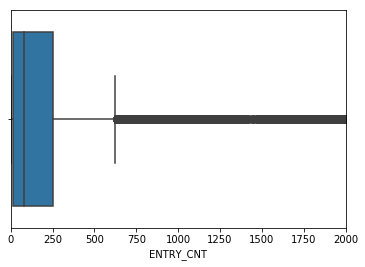

In [127]:
# Checking outliers
sns.boxplot(full_dataset.ENTRY_CNT,whis=1.5)
plt.xlim(0,2000)

In [128]:
# Caculate % of outliers
len(full_dataset[full_dataset.ENTRY_CNT<1400])/len(full_dataset)

0.9924564698044962

In [129]:
# Delete outliers
full_dataset=full_dataset[full_dataset.ENTRY_CNT<1400]

In [130]:
# Making a new column that merges STATION and LINENAME columns
full_dataset['STATION_NAME']=full_dataset.STATION+' '+full_dataset.LINENAME
full_dataset

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CA,DATE,DESC,DIVISION,ENTRIES,EXITS,LINENAME,SCP,STATION,TIME,UNIT,DTTM,MONTH,YEAR,WEEKDAY,ENTRY_CNT,STATION_NAME,ENTRY_PCT
1992351,H007,03/28/2015,REGULAR,BMT,9517255,10343369.0,L,00-00-00,1 AV,00:00:00,R248,2015-03-28 00:00:00,3,2015,5,0.0,1 AV L,0.000000
1992352,H007,03/28/2015,REGULAR,BMT,9517594,10343662.0,L,00-00-00,1 AV,04:00:00,R248,2015-03-28 04:00:00,3,2015,5,339.0,1 AV L,0.000067
1992353,H007,03/28/2015,REGULAR,BMT,9517820,10343978.0,L,00-00-00,1 AV,08:00:00,R248,2015-03-28 08:00:00,3,2015,5,226.0,1 AV L,0.000045
1992354,H007,03/28/2015,REGULAR,BMT,9518976,10344680.0,L,00-00-00,1 AV,12:00:00,R248,2015-03-28 12:00:00,3,2015,5,1156.0,1 AV L,0.000228
1992355,H007,03/28/2015,REGULAR,BMT,9520343,10345667.0,L,00-00-00,1 AV,16:00:00,R248,2015-03-28 16:00:00,3,2015,5,1367.0,1 AV L,0.000269
1992356,H007,03/28/2015,REGULAR,BMT,9521084,10346984.0,L,00-00-00,1 AV,20:00:00,R248,2015-03-28 20:00:00,3,2015,5,741.0,1 AV L,0.000146
1992357,H007,03/29/2015,REGULAR,BMT,9521707,10347861.0,L,00-00-00,1 AV,00:00:00,R248,2015-03-29 00:00:00,3,2015,6,623.0,1 AV L,0.000123
1992358,H007,03/29/2015,REGULAR,BMT,9521946,10348240.0,L,00-00-00,1 AV,04:00:00,R248,2015-03-29 04:00:00,3,2015,6,239.0,1 AV L,0.000047
1992359,H007,03/29/2015,REGULAR,BMT,9522007,10348471.0,L,00-00-00,1 AV,08:00:00,R248,2015-03-29 08:00:00,3,2015,6,61.0,1 AV L,0.000012
1992360,H007,03/29/2015,REGULAR,BMT,9522484,10349154.0,L,00-00-00,1 AV,12:00:00,R248,2015-03-29 12:00:00,3,2015,6,477.0,1 AV L,0.000094


In [132]:
#Check data for mispelled Stations and Lines to identify multiple entries for same stations
full_dataset['STATION_NAME'].unique()


array(['1 AV L', '103 ST 1', '103 ST 6', '103 ST BC', '103 ST-CORONA 7',
       '104 ST A', '104 ST JZ', '110 ST 6', '110 ST-CATHEDRL 1',
       '110 ST-CPN 23', '111 ST 7', '111 ST A', '111 ST J', '116 ST 23',
       '116 ST 6', '116 ST BC', '116 ST-COLUMBIA 1', '121 ST JZ',
       '125 ST 1', '125 ST 23', '125 ST 456', '125 ST ABCD', '135 ST 23',
       '135 ST BC', '137 ST CITY COL 1', '137 ST-CITY COL 1',
       '138 ST-3 AVE 6', '138 ST-GR CONC 45', '138/GRAND CONC 45',
       '14 ST 123FLM', '14 ST ACEL', '14 ST-6 AVE 123FLM',
       '14 ST-UNION SQ 456LNQR', '14 ST-UNION SQ 456LNQRW', '145 ST 1',
       '145 ST 3', '145 ST ABCD', '148 ST-LENOX 3', '149 ST-3 AVE 25',
       '149 ST-GR CONC 245', '149/GRAND CONC 245', '14TH STREET 1',
       '15 ST-PROSPECT FG', '155 ST BD', '155 ST C', '157 ST 1',
       '161 ST-YANKEE 4BD', '161/YANKEE STAD 4BD', '163 ST-AMSTERDM C',
       '167 ST 4', '167 ST BD', '168 ST 1AC', '168 ST-BROADWAY 1AC',
       '169 ST F', '170 ST 4', '170 ST BD', 

In [150]:
# Entry count by date
entry_by_date = full_dataset.groupby(['DATE'])['ENTRY_CNT'].sum().reset_index()
entry_by_date

,DATE,ENTRY_CNT
0,03/25/2017,2858243.0
1,03/26/2016,2923775.0
2,03/26/2017,2676377.0
3,03/27/2016,2731582.0
4,03/27/2017,5263780.0
5,03/28/2015,2916024.0
6,03/28/2016,5128145.0
7,03/28/2017,5495976.0
8,03/29/2015,2867865.0
9,03/29/2016,5448720.0


In [151]:
# Entry count by year
yearly = full_dataset.groupby(['YEAR'])['ENTRY_CNT'].sum().reset_index()
yearly

,YEAR,ENTRY_CNT
0,2015,166249237.0
1,2016,164937872.0
2,2017,166655114.0


## Plots and Graphs 

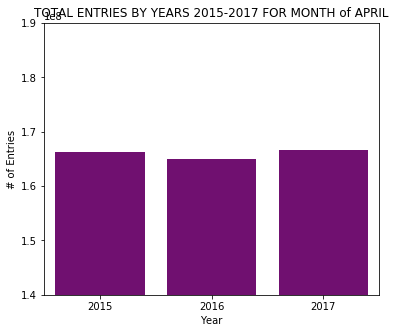

In [152]:
# Entry count by year - PLOT
plt.subplots(figsize=(6,5))
ax=sns.barplot(x='YEAR', y='ENTRY_CNT', data=yearly, color="purple")
ax.patch.set_alpha(0.0)
plt.ylim(140000000, 190000000)
plt.ylabel('# of Entries')
plt.xlabel('Year')
plt.title('TOTAL ENTRIES BY YEARS 2015-2017 FOR MONTH of APRIL')
plt.savefig('graphs/Yearly.png')

In [153]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2854411 entries, 1992351 to 2898557
Data columns (total 18 columns):
CA              object
DATE            object
DESC            object
DIVISION        object
ENTRIES         int64
EXITS           float64
LINENAME        object
SCP             object
STATION         object
TIME            object
UNIT            object
DTTM            datetime64[ns]
MONTH           int64
YEAR            int64
WEEKDAY         int64
ENTRY_CNT       float64
STATION_NAME    object
ENTRY_PCT       float64
dtypes: datetime64[ns](1), float64(3), int64(4), object(10)
memory usage: 413.8+ MB


In [154]:
#check total Entry Count for three years 
total_system = full_dataset['ENTRY_CNT'].sum()
total_system


497842223.0

In [155]:
# Add new column: Entry % by turnstile of all system
full_dataset['ENTRY_PCT']=[100*x/total_system for x in full_dataset['ENTRY_CNT']]
full_dataset

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CA,DATE,DESC,DIVISION,ENTRIES,EXITS,LINENAME,SCP,STATION,TIME,UNIT,DTTM,MONTH,YEAR,WEEKDAY,ENTRY_CNT,STATION_NAME,ENTRY_PCT
1992351,H007,03/28/2015,REGULAR,BMT,9517255,10343369.0,L,00-00-00,1 AV,00:00:00,R248,2015-03-28 00:00:00,3,2015,5,0.0,1 AV L,0.000000
1992352,H007,03/28/2015,REGULAR,BMT,9517594,10343662.0,L,00-00-00,1 AV,04:00:00,R248,2015-03-28 04:00:00,3,2015,5,339.0,1 AV L,0.000068
1992353,H007,03/28/2015,REGULAR,BMT,9517820,10343978.0,L,00-00-00,1 AV,08:00:00,R248,2015-03-28 08:00:00,3,2015,5,226.0,1 AV L,0.000045
1992354,H007,03/28/2015,REGULAR,BMT,9518976,10344680.0,L,00-00-00,1 AV,12:00:00,R248,2015-03-28 12:00:00,3,2015,5,1156.0,1 AV L,0.000232
1992355,H007,03/28/2015,REGULAR,BMT,9520343,10345667.0,L,00-00-00,1 AV,16:00:00,R248,2015-03-28 16:00:00,3,2015,5,1367.0,1 AV L,0.000275
1992356,H007,03/28/2015,REGULAR,BMT,9521084,10346984.0,L,00-00-00,1 AV,20:00:00,R248,2015-03-28 20:00:00,3,2015,5,741.0,1 AV L,0.000149
1992357,H007,03/29/2015,REGULAR,BMT,9521707,10347861.0,L,00-00-00,1 AV,00:00:00,R248,2015-03-29 00:00:00,3,2015,6,623.0,1 AV L,0.000125
1992358,H007,03/29/2015,REGULAR,BMT,9521946,10348240.0,L,00-00-00,1 AV,04:00:00,R248,2015-03-29 04:00:00,3,2015,6,239.0,1 AV L,0.000048
1992359,H007,03/29/2015,REGULAR,BMT,9522007,10348471.0,L,00-00-00,1 AV,08:00:00,R248,2015-03-29 08:00:00,3,2015,6,61.0,1 AV L,0.000012
1992360,H007,03/29/2015,REGULAR,BMT,9522484,10349154.0,L,00-00-00,1 AV,12:00:00,R248,2015-03-29 12:00:00,3,2015,6,477.0,1 AV L,0.000096


In [156]:
#Entry % by station
stations=full_dataset.groupby(['STATION_NAME']).sum().reset_index()
stations

,STATION_NAME,ENTRIES,EXITS,MONTH,YEAR,WEEKDAY,ENTRY_CNT,ENTRY_PCT
0,1 AV L,710098273598,1.131204e+12,23035,12059681,18063,1708769.0,0.343235
1,103 ST 1,38873129431,2.022485e+10,14475,7574091,11198,1241806.0,0.249438
2,103 ST 6,31450058579,2.207186e+11,13952,7297901,10617,1216505.0,0.244356
3,103 ST BC,15791322155,1.411325e+10,7272,3804183,5628,443381.0,0.089061
4,103 ST-CORONA 7,41334889370,3.878063e+10,21671,11342009,16784,1830442.0,0.367675
5,104 ST A,69634036561,3.472366e+11,6414,3387722,5048,107532.0,0.021600
6,104 ST JZ,270199239232,4.123402e+11,7303,3822340,5696,185270.0,0.037215
7,110 ST 6,18635600388,1.829821e+10,14758,7725332,11331,1197255.0,0.240489
8,110 ST-CATHEDRL 1,8867936934,3.870607e+09,5770,2970110,4422,403854.0,0.081121
9,110 ST-CPN 23,13540698897,5.397030e+09,4932,2538900,3780,313417.0,0.062955


In [157]:
#Top 15 stations of overall traffic
top_stations=stations.sort_values(['ENTRY_PCT'],ascending=False).head(15)[['STATION_NAME','ENTRY_PCT']]
top_stations
#top_stations.to_csv('Top15stations.csv')

,STATION_NAME,ENTRY_PCT
123,34 ST-PENN STA ACE,1.408002
445,FULTON ST 2345ACJZ,1.305137
459,GRD CNTRL-42 ST 4567S,1.088232
118,34 ST-HERALD SQ BDFMNQR,1.079252
32,14 ST-UNION SQ 456LNQR,0.998126
221,86 ST 456,0.801187
198,72 ST 123,0.776123
231,96 ST 123,0.729860
496,JAY ST-METROTEC ACF,0.729053
174,59 ST COLUMBUS 1ABCD,0.720577


In [158]:
#Total % covered by those 15 stations
top_stations.ENTRY_PCT.sum()

13.06725986558186

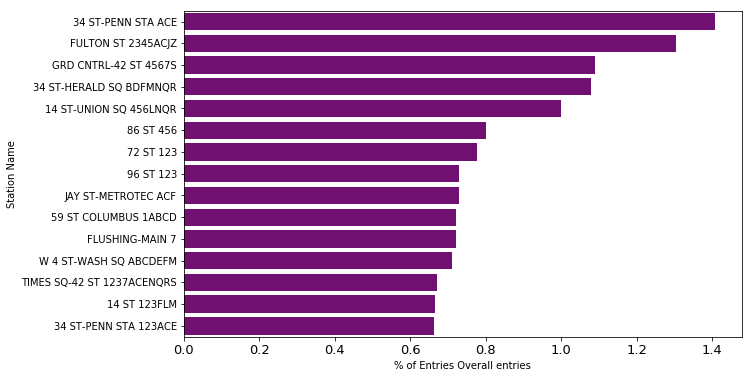

In [159]:
#Top 15 stations by traffic % - PLOT
plt.subplots(figsize=(10,6))
ax=sns.barplot(x='ENTRY_PCT', y='STATION_NAME', data=top_stations, color="purple")
ax.patch.set_alpha(0.0)
plt.xticks(fontsize=13)
plt.xlabel('% of Entries Overall entries')
plt.ylabel('Station Name')
plt.savefig('graphs/Top15Stations.png')

In [161]:
# Trafic by day of the week - PLOT
#Monday is 0 and Sunday is 6
weekday = full_dataset.groupby(['WEEKDAY'])['ENTRY_CNT'].sum().reset_index()
weekday

,WEEKDAY,ENTRY_CNT
0,0,78055829.0
1,1,80628480.0
2,2,82397998.0
3,3,82730066.0
4,4,81021959.0
5,5,50354450.0
6,6,42653441.0


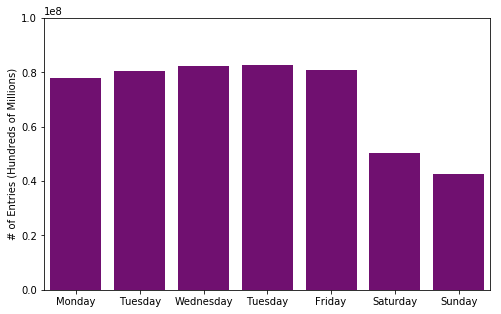

In [162]:
plt.subplots(figsize=(8,5))
ax=sns.barplot(x='WEEKDAY', y='ENTRY_CNT', data=weekday, color="purple")
ax.patch.set_alpha(0.0)
plt.xlabel('')
plt.ylabel('# of Entries (Hundreds of Millions)')
#Monday is 0 and Sunday is 6
plt.xticks(weekday['WEEKDAY'], ['Monday', 'Tuesday', 'Wednesday', 'Tuesday', 'Friday', 'Saturday', 'Sunday'])
plt.ylim(0, 100000000)

plt.savefig('graphs/Weekly.png')

In [163]:
# Add new column for hour binning
full_dataset['HOUR'] = full_dataset.DTTM.dt.hour
full_dataset.head(10)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CA,DATE,DESC,DIVISION,ENTRIES,EXITS,LINENAME,SCP,STATION,TIME,UNIT,DTTM,MONTH,YEAR,WEEKDAY,ENTRY_CNT,STATION_NAME,ENTRY_PCT,HOUR
1992351,H007,03/28/2015,REGULAR,BMT,9517255,10343369.0,L,00-00-00,1 AV,00:00:00,R248,2015-03-28 00:00:00,3,2015,5,0.0,1 AV L,0.000000,0
1992352,H007,03/28/2015,REGULAR,BMT,9517594,10343662.0,L,00-00-00,1 AV,04:00:00,R248,2015-03-28 04:00:00,3,2015,5,339.0,1 AV L,0.000068,4
1992353,H007,03/28/2015,REGULAR,BMT,9517820,10343978.0,L,00-00-00,1 AV,08:00:00,R248,2015-03-28 08:00:00,3,2015,5,226.0,1 AV L,0.000045,8
1992354,H007,03/28/2015,REGULAR,BMT,9518976,10344680.0,L,00-00-00,1 AV,12:00:00,R248,2015-03-28 12:00:00,3,2015,5,1156.0,1 AV L,0.000232,12
1992355,H007,03/28/2015,REGULAR,BMT,9520343,10345667.0,L,00-00-00,1 AV,16:00:00,R248,2015-03-28 16:00:00,3,2015,5,1367.0,1 AV L,0.000275,16
1992356,H007,03/28/2015,REGULAR,BMT,9521084,10346984.0,L,00-00-00,1 AV,20:00:00,R248,2015-03-28 20:00:00,3,2015,5,741.0,1 AV L,0.000149,20
1992357,H007,03/29/2015,REGULAR,BMT,9521707,10347861.0,L,00-00-00,1 AV,00:00:00,R248,2015-03-29 00:00:00,3,2015,6,623.0,1 AV L,0.000125,0
1992358,H007,03/29/2015,REGULAR,BMT,9521946,10348240.0,L,00-00-00,1 AV,04:00:00,R248,2015-03-29 04:00:00,3,2015,6,239.0,1 AV L,0.000048,4
1992359,H007,03/29/2015,REGULAR,BMT,9522007,10348471.0,L,00-00-00,1 AV,08:00:00,R248,2015-03-29 08:00:00,3,2015,6,61.0,1 AV L,0.000012,8
1992360,H007,03/29/2015,REGULAR,BMT,9522484,10349154.0,L,00-00-00,1 AV,12:00:00,R248,2015-03-29 12:00:00,3,2015,6,477.0,1 AV L,0.000096,12


In [164]:
# Bin hour intervals
full_dataset['HOUR']=pd.cut(full_dataset['HOUR'],[0,4,8,12,16,20,24])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [166]:
# Hourly Total traffic in bins
hourly=full_dataset.groupby('HOUR')['ENTRY_CNT'].sum().reset_index()
hourly


,HOUR,ENTRY_CNT
0,"(0, 4]",20637657.0
1,"(4, 8]",44024210.0
2,"(8, 12]",113823862.0
3,"(12, 16]",102470984.0
4,"(16, 20]",137217793.0
5,"(20, 24]",49287089.0


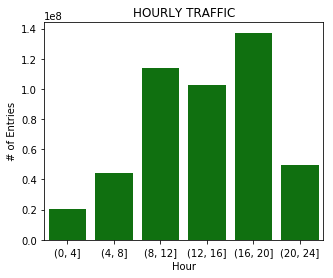

In [167]:
# Hourly Total traffic - PLOT
plt.subplots(figsize=(5,4))
sns.barplot('HOUR', y='ENTRY_CNT', data=hourly, color="green")
plt.xlabel('Hour')
plt.ylabel('# of Entries')
plt.title('HOURLY TRAFFIC')

plt.savefig('graphs/Hourly.png')

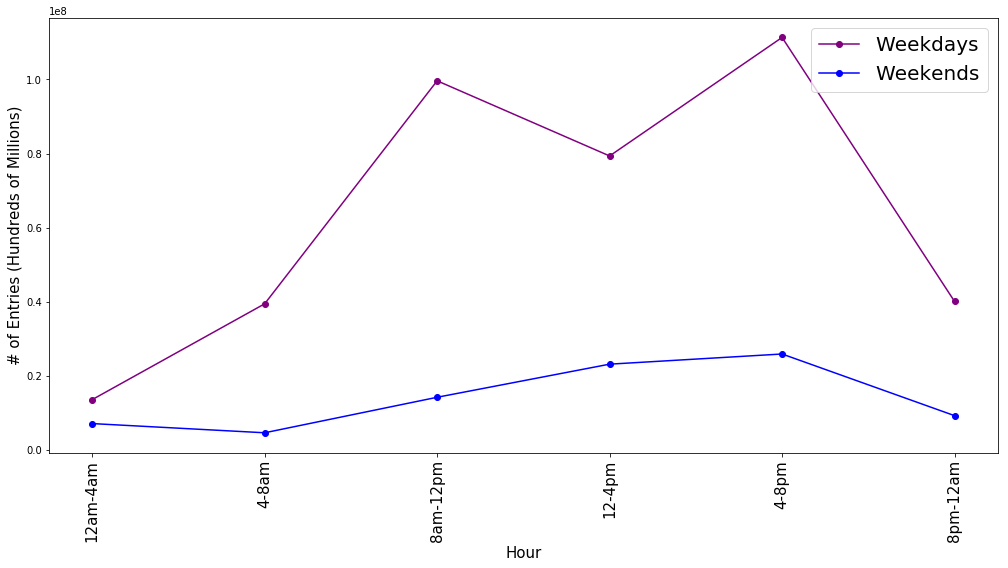

In [168]:
# Weekday vs Weekend total traffic - PLOT
weekdays=full_dataset[full_dataset.WEEKDAY<5].groupby('HOUR')['ENTRY_CNT'].sum().reset_index()
weekends=full_dataset[full_dataset.WEEKDAY>=5].groupby('HOUR')['ENTRY_CNT'].sum().reset_index()
x = range(0,6)

plt.figure(figsize=(17,8))
plt.plot(x, weekdays.ENTRY_CNT, 'ko', color="purple", label='Weekdays', linestyle='-')
plt.plot(x, weekends.ENTRY_CNT, 'ko', color="blue", label='Weekends', linestyle='-')

plt.xticks(np.arange(6), ('12am-4am', '4-8am', '8am-12pm', '12-4pm', '4-8pm', '8pm-12am'), rotation=90, fontsize=15);

plt.xlabel('Hour', fontsize=15)
plt.ylabel('# of Entries (Hundreds of Millions)', fontsize=15)

plt.legend(loc='upper right',fontsize=20)
plt.savefig('graphs/Hourly.png')

In [1]:
# Heatmap generic function
def oneStationHeatmap(full_dataset, station, group1, group2, xlabel, ylabel, labels):
    df=full_dataset[full_dataset.STATION==station].groupby([group1, group2])['ENTRY_CNT'].sum().reset_index()
    data_st = df.pivot(group1, group2, "ENTRY_CNT")

    # Draw a heatmap with the numeric values in each cell
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(data_st, annot=False, linewidths=.5, ax=ax, yticklabels=labels, cmap='YlGnBu')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.savefig('graphs/'+ station +'.png')

### Individual Stations Case Study 

In [172]:
# Particular 116st Analysis (Awareness)
weekday_labels= ['Monday', 'Tuesday', 'Wednesday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']
df_116st=full_dataset[full_dataset.STATION=='116 ST'].groupby(['WEEKDAY', 'HOUR'])['ENTRY_CNT'].sum().reset_index()
df_116st

,WEEKDAY,HOUR,ENTRY_CNT
0,0,"(0, 4]",24161.0
1,0,"(4, 8]",7599.0
2,0,"(8, 12]",142002.0
3,0,"(12, 16]",105536.0
4,0,"(16, 20]",128462.0
5,0,"(20, 24]",110396.0
6,1,"(0, 4]",28567.0
7,1,"(4, 8]",8802.0
8,1,"(8, 12]",141489.0
9,1,"(12, 16]",112486.0


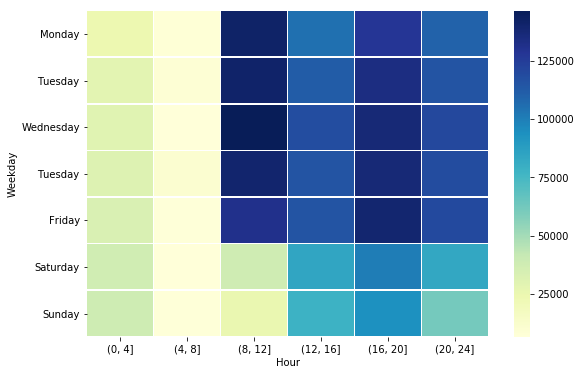

In [173]:
# Particular 116st Analysis (Awareness) - PLOT
oneStationHeatmap(full_dataset, '116 ST', 'WEEKDAY', 'HOUR', 'Hour', 'Weekday', weekday_labels)

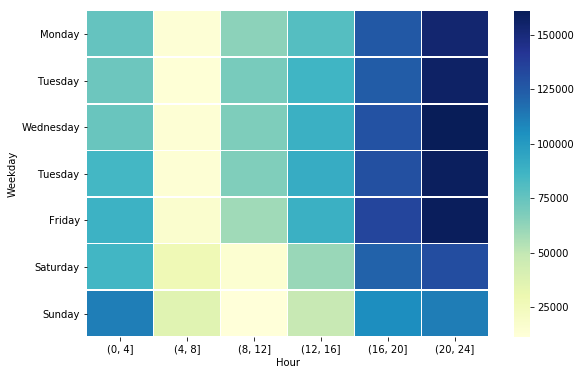

In [174]:
# Particular 4st Analysis (Awareness) - PLOT
oneStationHeatmap(full_dataset, 'W 4 ST-WASH SQ', 'WEEKDAY', 'HOUR', 'Hour', 'Weekday', weekday_labels)


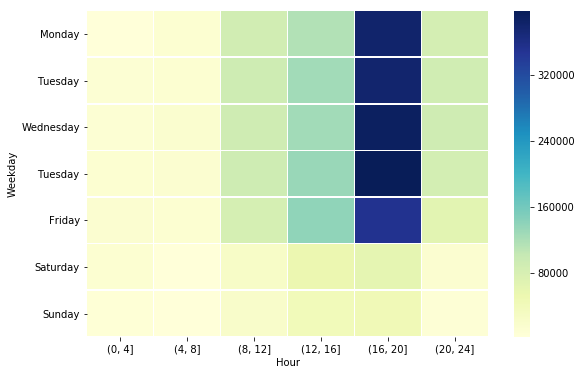

In [175]:
# Particular Wall St Analysis (FundRaising) - PLOT
oneStationHeatmap(full_dataset, 'WALL ST', 'WEEKDAY', 'HOUR', 'Hour', 'Weekday', weekday_labels)


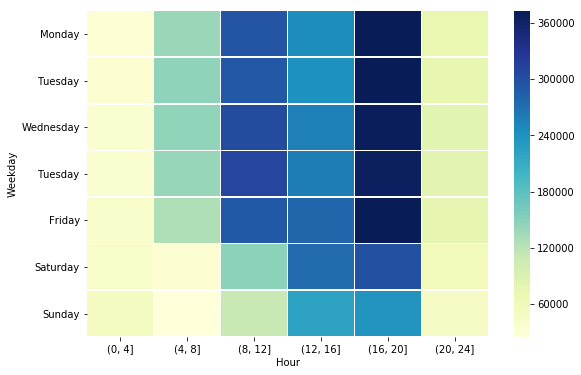

In [176]:
# Particular 86th St Analysis (FundRaising) - PLOT
oneStationHeatmap(full_dataset, '86 ST', 'WEEKDAY', 'HOUR', 'Hour', 'Weekday', weekday_labels)

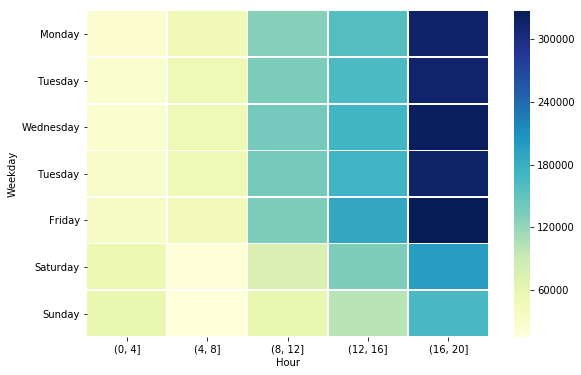

In [177]:
# Particular Times Sq-42 St Analysis (Big Station) - PLOT
oneStationHeatmap(full_dataset, 'TIMES SQ-42 ST', 'WEEKDAY', 'HOUR', 'Hour', 'Weekday', weekday_labels)

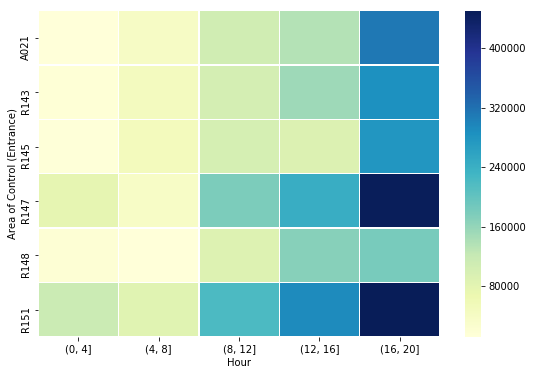

In [178]:
# Particular Times Sq-42 St Analysis (Big Station) by Access Point - PLOT
ac_names=full_dataset[full_dataset.STATION=='TIMES SQ-42 ST']['CA'].unique()
oneStationHeatmap(full_dataset, 'TIMES SQ-42 ST', 'CA', 'HOUR', 'Hour', 'Area of Control (Entrance)', ac_names)